In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 
from scipy.signal import savgol_filter
from numba import njit 
import pandas as pd

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 19

In [5]:
def compute_sd(traj):      
    x = traj['x (micron)'].values
    y = traj['y (micron)'].values
    x0 = x[0]
    y0 = y[0]
    return np.sqrt( (x-x0)**2 + (y-y0)**2)

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid',) / w

In [6]:
dataframe_isolated = pd.read_csv('data/group-trajectories/second_wave/isolated_pairs_video1_v3_wspeeds.csv',index_col = 0)
ids_isolated = dataframe_isolated['Track ID'].unique()
all_speeds_isolated = []
computed_ids_isolated = []
for id in ids_isolated: 
    traj = dataframe_isolated[dataframe_isolated['Track ID']==id].sort_values('Frame')
    if traj['Info'].values[0] == "Isolated" and id != 16:
        computed_ids_isolated.append(id)
dataframe_isolated

,Track ID,x (micron),y (micron),t (sec),Frame,Info,Obs,vx,vy,speed
Spot ID,,,,,,,,,,
2001,0,32.908503,33.861253,0.000000,0,Isolated,No obs,0.000000,0.000000,0.000000
2064,0,32.882753,33.887003,3.334563,1,Isolated,No obs,-0.007721,0.007721,0.010919
2068,0,32.779753,33.475003,6.669126,2,Isolated,No obs,-0.030885,-0.123538,0.127340
2071,0,32.728253,33.063003,10.003688,3,Isolated,No obs,-0.015442,-0.123538,0.124500
2073,0,32.857003,33.217503,13.338251,4,Isolated,No obs,0.038606,0.046327,0.060304
...,...,...,...,...,...,...,...,...,...,...
17599,18,76.820840,47.225504,650.239749,195,Pairs,In pairs between frames 78 and 139,-0.077211,-0.010295,0.077895
17601,18,76.923840,47.174004,653.574312,196,Pairs,In pairs between frames 78 and 139,0.030885,-0.015442,0.034530
17603,18,77.061174,47.105338,656.908874,197,Pairs,In pairs between frames 78 and 139,0.041179,-0.020590,0.046040


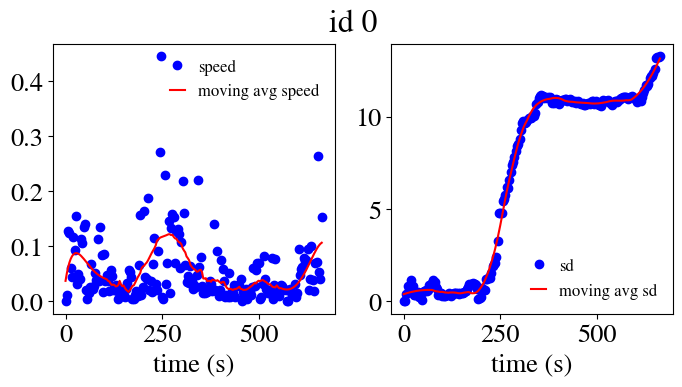

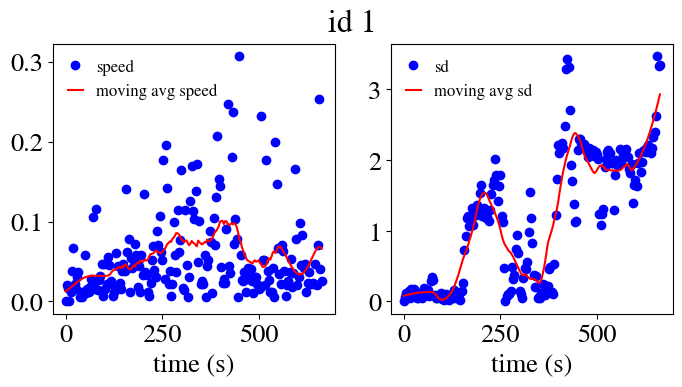

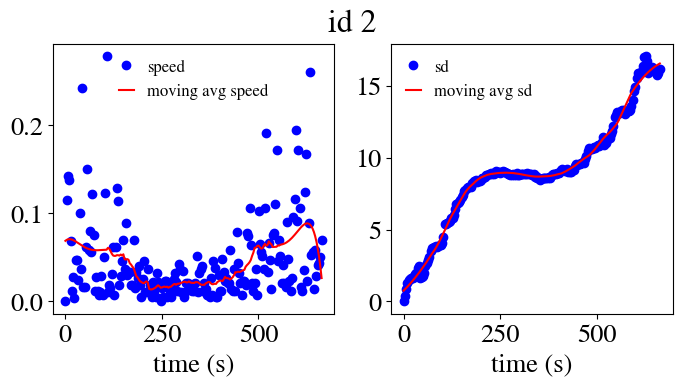

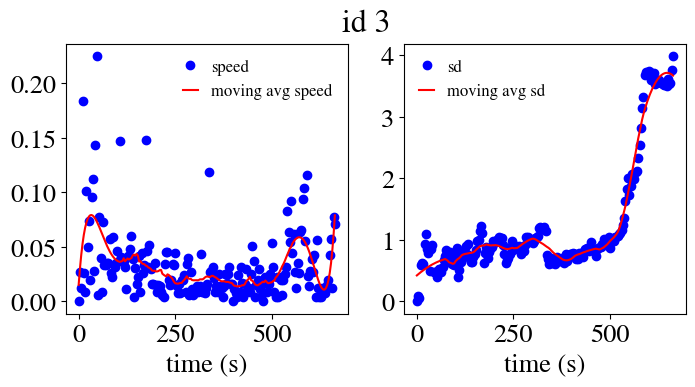

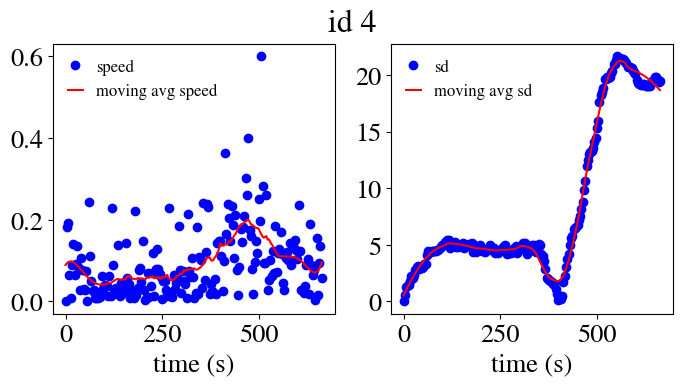

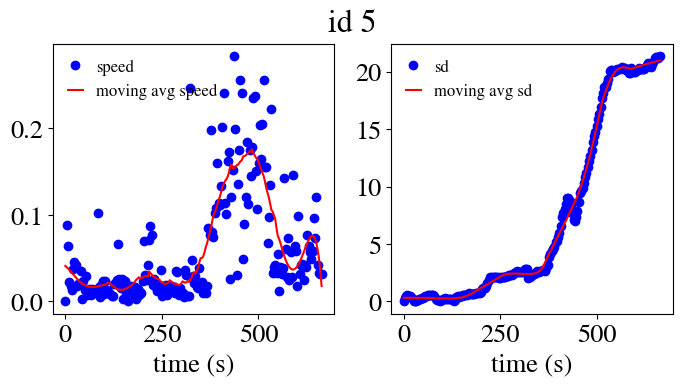

In [128]:
all_speeds_smooths = []
all_speeds = []
for id in computed_ids_isolated[:]:
    traj = dataframe_isolated[dataframe_isolated['Track ID']==id].sort_values('Frame')
    sd = compute_sd(traj)
    time = traj['t (sec)'].values
    speed = traj['speed'].values
    # sd_smooth = moving_average(sd,4)

    window_sd = 45
    order_sd = 2
    window_speed = 65
    order_speed = 5
    sd_smooth = savgol_filter(sd,window_sd,order_sd)

    speed_smooth = savgol_filter(speed,window_speed,order_speed) 
    plt.figure(figsize=(8,3.5))
    plt.suptitle(f'id {id}')
    plt.subplot(1,2,1)
    
    plt.plot(time,speed,'bo',label='speed')
    plt.plot(time,speed_smooth,lw=1.5,color='red',label='moving avg speed')
    plt.legend(fontsize=12,handlelength=0.9,frameon=False)
    # plt.figure(figsize=(4,4))
    # # plt.title(f'window = {window}',fontsize=14)
    plt.xlabel('time (s)')
    plt.subplot(1,2,2)
    plt.plot(time,sd,'bo',label='sd')
    plt.plot(time,sd_smooth,lw=1.5,color='red',label='moving avg sd')
    plt.legend(fontsize=12,handlelength=0.9,frameon=False)
    plt.xlabel('time (s)')
    plt.show()
    all_speeds_smooths += list(speed_smooth)
    all_speeds += list(speed)
    

    

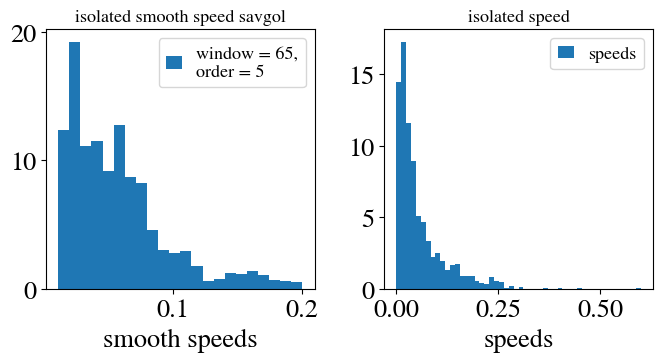

In [119]:
plt.figure(figsize=(7,4),layout='tight')
plt.subplot(1,2,1)

plt.hist(all_speeds_smooths,label=f'window = {window_speed},\norder = {order_speed}',bins='auto',density=True)
plt.xlabel('smooth speeds')
plt.title('isolated smooth speed savgol',fontsize=13)
plt.legend(fontsize=13,handlelength=0.9,frameon=True)
# plt.semilogy()
plt.subplot(1,2,2)

plt.hist(all_speeds,label='speeds',bins=50,density=True)
plt.xlabel('speeds')
plt.title('isolated speed',fontsize=13)
plt.legend(fontsize=13,handlelength=0.9,frameon=True)
# plt.semilogy()
plt.show()